In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('nyc-rolling-sales.csv').drop('Unnamed: 0',axis=1)
data.head()

FileNotFoundError: ignored

In [3]:
data.isnull().sum()

NameError: ignored

In [4]:
data.info(verbose=True)

NameError: ignored

In [ ]:
print('São {} linhas'.format(data.shape[0]))
print('Sendo {} sem o valor de venda do imóvel'.format(data[data['SALE PRICE'].str.contains('-')].shape[0]))

São 84548 linhas
Sendo 14561 sem o valor de venda do imóvel


In [ ]:
#Continuar a análise com os dados que possui a info. de valor de venda
df = data[~data['SALE PRICE'].str.contains('-')]
df['SALE PRICE'] = df['SALE PRICE'].apply(lambda x: int(x))

print('Existem também {} imóveis com valor de venda 0. Não são vendas e sim transferências de títulos.'.format(df[df['SALE PRICE']==0].shape[0]))
#Deletando esses casos ...
df = df[~(df['SALE PRICE']==0)]
print('Deletando esses casos, a amostra fica de {} vendas'.format(df.shape[0]))
df.head()

Existem também 10228 imóveis com valor de venda 0. Não são vendas e sim transferências de títulos.
Deletando esses casos, a amostra fica de 59759 vendas


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [ ]:
df['SALE PRICE'].describe()

count    5.975900e+04
mean     1.494927e+06
std      1.232953e+07
min      1.000000e+00
25%      3.700000e+05
50%      6.255000e+05
75%      1.070000e+06
max      2.210000e+09
Name: SALE PRICE, dtype: float64

[(0, 10000000)]

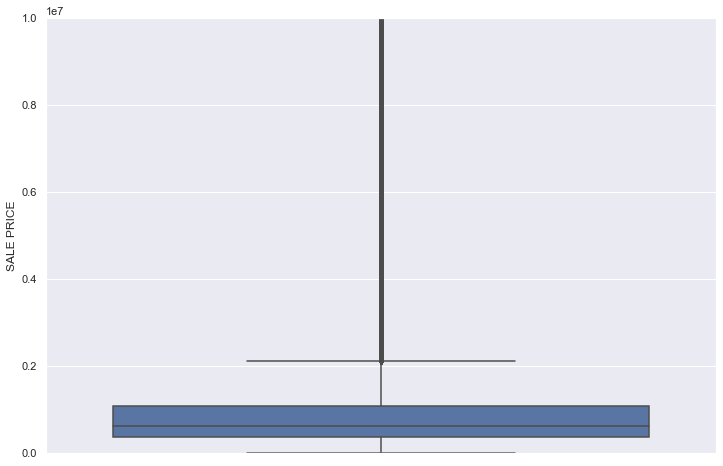

In [ ]:
#sns.histplot(data=df, x='SALE PRICE', kde=False, bins=50)
ax = sns.boxplot(data=df, y='SALE PRICE')
ax.set(ylim=(0,10000000))

[(0, 10000000)]

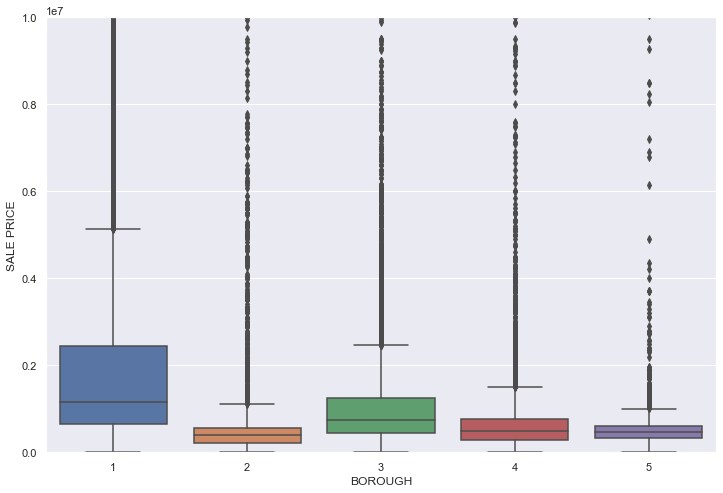

In [ ]:
ax = sns.boxplot(data=df, x='BOROUGH', y='SALE PRICE')
ax.set(ylim=(0,10000000))

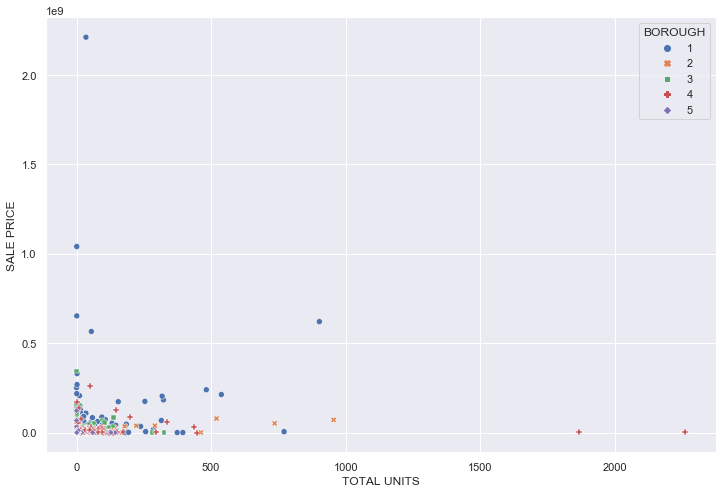

In [ ]:
sns.scatterplot(data=df, x='TOTAL UNITS',y='SALE PRICE',hue='BOROUGH', style='BOROUGH', palette="deep")

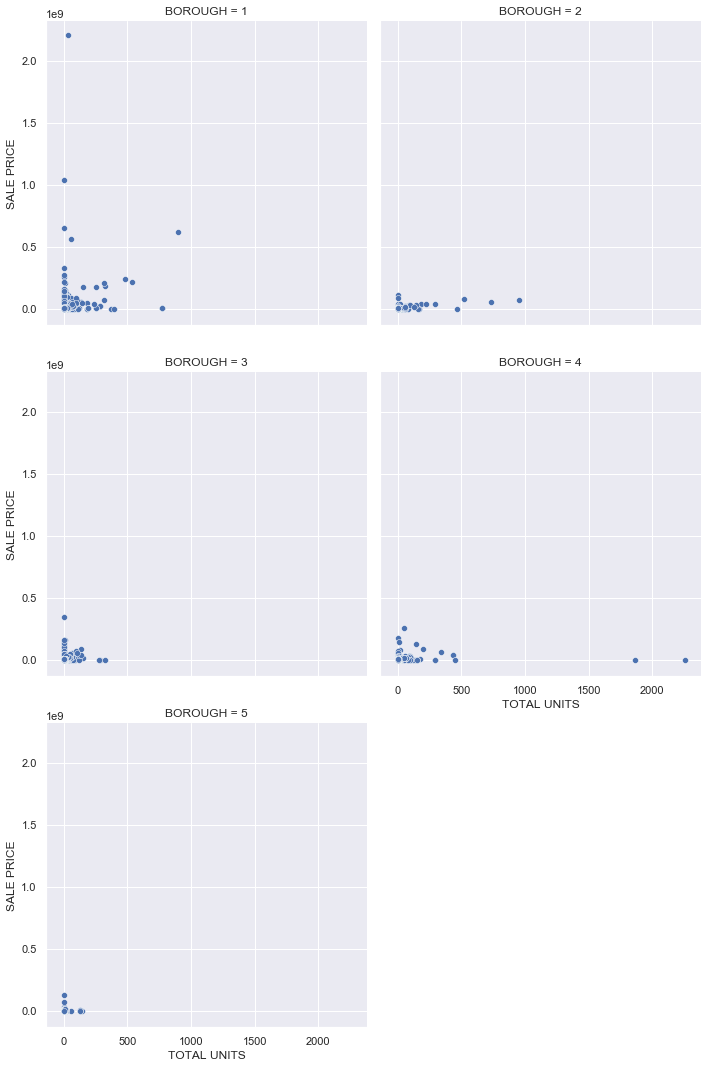

In [ ]:
sns.relplot(data=df,  x='TOTAL UNITS',y='SALE PRICE', col='BOROUGH', kind='scatter', col_wrap=2)

[(0, 30)]

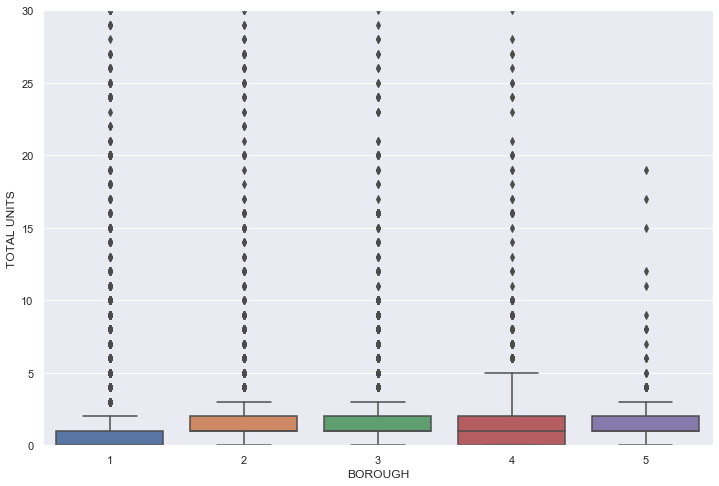

In [ ]:
ax = sns.boxplot(data=df, x='BOROUGH', y='TOTAL UNITS')
ax.set(ylim=(0,30))

In [ ]:
df['TOTAL UNITS'].describe()

count    59759.000000
mean         1.903663
std         17.337769
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       2261.000000
Name: TOTAL UNITS, dtype: float64

In [ ]:
df['YEAR BUILT'].unique()

array([1900, 1913, 1920, 2009, 1925, 1902, 1928, 1910, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005,    0, 1989, 2014, 2008, 1965,
       2013, 2003, 2006, 2007, 1951, 1899, 1850, 1905, 1864, 1917, 1911,
       1983, 1926, 1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958,
       1904, 1907, 1987, 1931, 1984, 1948, 2004, 1875, 2012, 1973, 2011,
       1922, 2001, 1932, 1980, 1908, 1953, 1906, 1921, 2010, 1111, 1918,
       1990, 1890, 1991, 1895, 1924, 2016, 1957, 1986, 1988, 1998, 1870,
       2015, 1969, 1956, 1982, 1914, 1903, 1967, 1912, 1964, 1955, 1961,
       1851, 2000, 1959, 1962, 1972, 1976, 1880, 1970, 1846, 1941, 1952,
       1923, 1896, 1985, 1966, 1981, 1954, 1946, 1947, 1975, 1974, 1968,
       2002, 1994, 1892, 1996, 1945, 1916, 1949, 1999, 1800, 1977, 1942,
       1979, 1978, 1971, 1919, 1894, 1881, 1936, 1997, 1995, 1933, 1934,
       1992, 1993, 1944, 1883, 1943, 1847, 1844, 1835, 1852, 1856, 1854,
       1832, 1845, 1849, 1855, 1893, 1865, 1882, 18

In [ ]:
df['BUILDING CLASS AT TIME OF SALE'].unique()

array(['C2', 'C4', 'D9', 'D1', 'C6', 'D0', 'D4', 'RR', 'R2', 'R4', 'S3',
       'S4', 'S5', 'R1', 'R8', 'R9', 'K4', 'RK', 'A9', 'A4', 'S2', 'C0',
       'R6', 'C3', 'C5', 'C1', 'C7', 'D6', 'D7', 'S9', 'O2', 'O1', 'O3',
       'O5', 'K1', 'K2', 'L8', 'L1', 'H1', 'H8', 'H3', 'G6', 'M1', 'N2',
       'RB', 'RG', 'R5', 'K9', 'L9', 'RS', 'GW', 'G2', 'V1', 'M4', 'Z9',
       'B9', 'D3', 'O6', 'O4', 'L3', 'H2', 'E1', 'D5', 'B3', 'B1', 'C9',
       'S1', 'A5', 'J8', 'B2', 'C8', 'F5', 'Q1', 'G7', 'G5', 'G4', 'Q9',
       'M9', 'Y1', 'RA', 'O8', 'HR', 'G1', 'E7', 'I5', 'R3', 'I9', 'I4',
       'N9', 'H9', 'RH', 'HB', 'J4', 'RW', 'A7', 'D2', 'O7', 'W3', 'HS',
       'H6', 'HH', 'W8', 'A1', 'F1', 'V9', 'A2', 'V0', 'G0', 'K5', 'F4',
       'G9', 'E9', 'I3', 'W4', 'I1', 'A6', 'Q8', 'Z0', 'A3', 'W1', 'F2',
       'F9', 'GU', 'I6', 'G8', 'P5', 'Y3', 'I7', 'M2', 'RP', 'K7', 'H4',
       'RT', 'W2', 'P8', 'K6', 'W9', 'V2', 'S0', 'P9', 'R0', 'K8', 'P6',
       'M3', 'A0', 'T2', 'V3', 'E2', 'O9', 'P2', 'J